# Dataset

In [1]:
import torch
from whale_dataset import WhaleDataset
import networkx as nx
from torch_geometric_temporal.nn import MTGNN
from config import CONFIG, COUNTRIES, GEOPOINT
from pathlib import Path
import contextily as cx
import matplotlib.pyplot as plt
from pyproj import Proj

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data & weights

In [2]:
dataset = WhaleDataset(CONFIG.model_config.seq_length - 1)

In [3]:
PATH = Path("../../") / "artifacts" / "model.pt"
model_config = CONFIG.model_config
model_config.num_nodes = len(dataset.dataframe.columns)
model = MTGNN(**model_config.dict())
model.load_state_dict(torch.load(PATH))
model = model.eval()

## Graph

In [4]:
A_tilde = model._graph_constructor(model._idx, FE=None)
# A_tilde = dataset.A_pathway
graph = nx.from_numpy_array(A_tilde.cpu().detach().numpy(), create_using=nx.MultiDiGraph)

In [5]:
# Attributes
edge_weights = nx.get_edge_attributes(graph, 'weight')
labels = {x: c for x, c in  zip(graph.nodes, COUNTRIES)}
p = Proj('EPSG:4326')
cmap = plt.get_cmap('YlGn')
pos = [(GEOPOINT[c][1], GEOPOINT[c][0]) for c in COUNTRIES]
colors = [cmap(x) for x in edge_weights.values()]

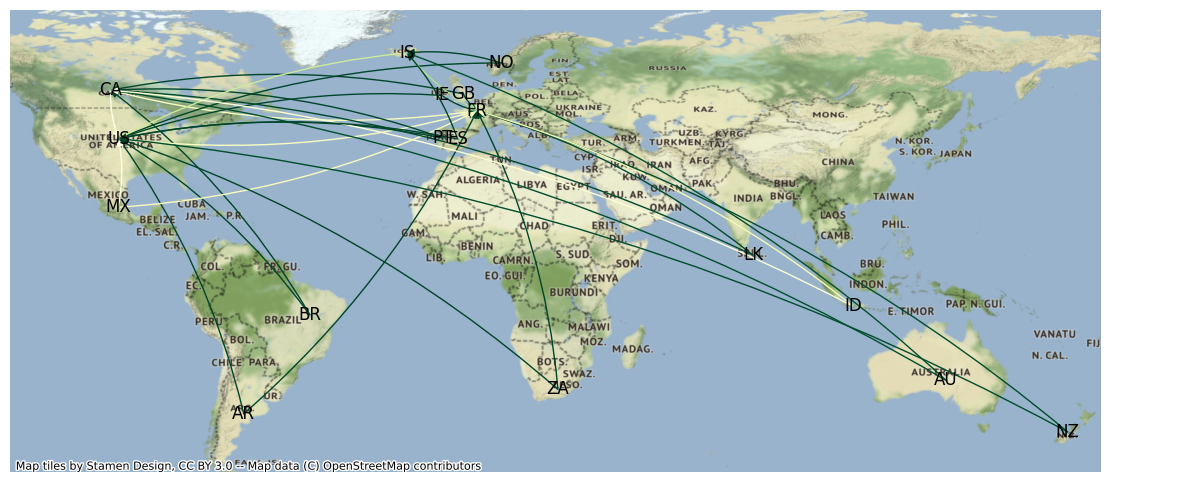

In [6]:
fig, ax = plt.subplots(figsize=(20,6))
nx.draw(graph, pos, labels=labels, node_size=0.1, with_labels=True, ax=ax, edge_color=colors, connectionstyle="arc3,rad=0.1") #, width=np.array(list(edge_weights.values()))
cx.add_basemap(ax, crs="EPSG:4326")